In [40]:
import polars as pl
import polars.selectors as cs
import soccerdata as sd
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as ps
import numpy as np
import pyarrow
import seaborn as sb

In [41]:
fbref = sd.FBref(seasons=2025)
print(fbref.__doc__)

[12/19/25 22:25:49] INFO     Saving cached data to C:\Users\User\soccerdata\data\FBref               ]8;id=167717;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=611751;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [42]:
player_season_stats = fbref.read_player_season_stats(stat_type="standard")
player_season_stats.head()


                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=563988;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=13354;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=163795;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=362084;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:25:52] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=229448;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=754081;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1220: UserWarning: Different columns found for [['ENG-Premier                  
                             League' '2526']] and [['TUR-Süper Lig' '2526']].                                      
                                                                                                                   
                             The following columns are missing in [['ENG-Premier League' '2526']]:                 
                             ('Expected', 'npxG'), ('Expected', 'npxG+xAG'), ('Expected', 'xAG'),                  
                             ('Expected', 'xG'), ('Per 90 Minutes', 'npxG'), ('Per 90 Minutes',                    
                             'npxG+xAG'), ('Per 90 Minutes', 'xAG'), ('Per 90 Minutes', 'xG'),                     
                             ('Per 90 Minutes', 'xG+xAG'), ('Progression', 'PrgC'), ('Progression',                
                             'PrgP'), ('Progression', 'PrgR').                                                     
                                                                                                                   
                             The following columns are missing in [['TUR-Süper Lig' '2526']]: .                    
                                                                                                                   
                             The columns of the dataframe with the most columns will be used.                      
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=428622;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=712274;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1273: FutureWarning: The behavior of DataFrame concatenation                   
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               return pd.concat(dfs)                                                               
                                                                                                                   

nation    pos  \
                                                                                
league               season team            player                              
ENG-EFL Championship 2526   Birmingham City Alex Cochrane          ENG     DF   
                                            Alfons Sampsted        ISL  DF,MF   
                                            Bright Osayi-Samuel    NGA     DF   
                                            Christoph Klarer       AUT     DF   
                                            Demarai Gray           JAM  FW,MF   

                                                                    age  born  \
                                                                                
league               season team            player                              
ENG-EFL Championship 2526   Birmingham City Alex Cochrane        25-241  2000   
                                            Alfons Sampsted      27-256  1998   
                                            Bright Osayi-Samuel  27-352  1997   
                                            Christoph Klarer     25-187  2000   
                                            Demarai Gray         29-173  1996   

                                                                Playing Time  \
                                                                          MP   
league               season team            player                             
ENG-EFL Championship 2526   Birmingham City Alex Cochrane                 18   
                                            Alfons Sampsted                2   
                                            Bright Osayi-Samuel           14   
                                            Christoph Klarer              21   
                                            Demarai Gray                  21   

                                                                              \
                                                                Starts   Min   
league               season team            player                             
ENG-EFL Championship 2526   Birmingham City Alex Cochrane           17  1466   
                                            Alfons Sampsted          0    24   
                                            Bright Osayi-Samuel     10   784   
                                            Christoph Klarer        21  1890   
                                            Demarai Gray            19  1577   

                                                                       \
                                                                  90s   
league               season team            player                      
ENG-EFL Championship 2526   Birmingham City Alex Cochrane        16.3   
                                            Alfons Sampsted       0.3   
                                            Bright Osayi-Samuel   8.7   
                                            Christoph Klarer     21.0   
                                            Demarai Gray         17.5   

                                                                Performance  \
                                                                        Gls   
league               season team            player                            
ENG-EFL Championship 2526   Birmingham City Alex Cochrane                 1   
                                            Alfons Sampsted               0   
                                            Bright Osayi-Samuel           0   
                                            Christoph Klarer              2   
                                            Demarai Gray                  5   

                                                                     ...  \
                                                                Ast  ...   
league               season team            player                   ...   
ENG-EFL Championship 2526   Birmingham

In [43]:
df = fbref.read_player_season_stats(stat_type='defense')

# Access only the Per 90 columns
print(df.columns)

[12/19/25 22:25:53] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=503188;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=628997;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=486475;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=464629;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

MultiIndex([(    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


In [44]:
print(player_season_stats.columns)

MultiIndex([(        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',      'xAG'),
            (      'Expected', 'npxG+xAG'),
            (   'Progression',     'PrgC'),
            (   'Progression',     'PrgP'),
            (   'Progression',  

In [45]:
fbref = sd.FBref(seasons = "2024-25")

defense = fbref.read_player_season_stats(stat_type="defense")
possesion = fbref.read_player_season_stats(stat_type="possession")
passing = fbref.read_player_season_stats(stat_type="passing")

[12/19/25 22:25:56] INFO     Saving cached data to C:\Users\User\soccerdata\data\FBref               ]8;id=237329;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=684163;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=864576;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=928180;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=340575;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=140851;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:00] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=901591;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=518946;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=888450;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=823758;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:05] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=765569;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=917822;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1220: UserWarning: Different columns found for [['ENG-Premier                  
                             League' '2425']] and [['TUR-Süper Lig' '2425']].                                      
                                                                                                                   
                             The following columns are missing in [['ENG-Premier League' '2425']]:                 
                             ('Carries', 'PrgC'), ('Receiving', 'PrgR'), ('Receiving', 'Rec').                     
                                                                                                                   
                             The following columns are missing in [['TUR-Süper Lig' '2425']]:                      
                             (None, 'Rec').                                                                        
                                                                                                                   
                             The columns of the dataframe with the most columns will be used.                      
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=866914;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=208608;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1273: FutureWarning: The behavior of DataFrame concatenation                   
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=919666;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=504534;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=827046;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=979102;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:09] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=358367;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=350800;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1220: UserWarning: Different columns found for [['ENG-Premier                  
                             League' '2425']] and [['TUR-Süper Lig' '2425']].                                      
                                                                                                                   
                             The following columns are missing in [['ENG-Premier League' '2425']]:                 
                             ('Expected', 'A-xAG'), ('Expected', 'xA'), (None, 'PrgP'), (None,                     
                             'xAG').                                                                               
                                                                                                                   
                             The following columns are missing in [['TUR-Süper Lig' '2425']]:                      
                             (None, 'A-xAG').                                                                      
                                                                                                                   
                             The columns of the dataframe with the most columns will be used.                      
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=286254;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=630494;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1273: FutureWarning: The behavior of DataFrame concatenation                   
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               return pd.concat(dfs)                                                               
                                                                                                                   

In [46]:
s = fbref.read_player_season_stats(stat_type="standard")
s1 = pl.from_pandas(s, include_index=True)
progress = fbref.read_player_season_stats(stat_type="possession")
p1 = pl.from_pandas(progress, include_index=True)
creative = fbref.read_player_season_stats(stat_type="goal_shot_creation")
c1 = pl.from_pandas(creative, include_index=True)
defense = fbref.read_player_season_stats(stat_type="defense")
d1 = pl.from_pandas(defense, include_index=True)

S = s1.drop("season")
S = S.drop("('nation', '')")
S = S.drop("('born', '')")
S = S.drop("('age', '')")

S = S.drop([
    "('Playing Time', 'MP')",     
    "('Playing Time', 'Starts')",
    "('Playing Time', 'Min')"
])

D = d1.drop("season")
D = D.drop("('nation', '')")
D = D.drop("('born', '')")
D = D.drop("('age', '')")
D = D.drop("('90s', '')")

C = c1.drop("season")
C = C.drop("('nation', '')")
C = C.drop("('born', '')")
C = C.drop("('age', '')")
C = C.drop("('90s', '')")

P = p1.drop("season")
P = P.drop("('nation', '')")
P = P.drop("('born', '')")
P = P.drop("('age', '')")
P = P.drop("('90s', '')")



all_player = S.join(P, on=["league", "team", "player"], how="inner", suffix="_progress")
all_player = all_player.join(C, on=["league", "team", "player"], how="inner", suffix="_creative")
all_player = all_player.join(D, on=["league", "team", "player"], how="inner", suffix="_defense")
all_player = all_player.filter(
    (pl.col("('pos', '')").str.contains("MF"))
)
all_player = all_player.drop("('pos', '')_progress")
all_player = all_player.drop("('pos', '')_creative")
all_player = all_player.drop("('pos', '')_defense")
all_player = all_player.drop("('pos', '')")     
all_player = all_player.drop(cs.matches(r"^\('Per 90 Minutes'.*"))
all_player = all_player.fill_nan(0.0)


[12/19/25 22:26:10] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=970528;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=191902;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=853293;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=393106;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:15] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=851890;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=561835;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1220: UserWarning: Different columns found for [['ENG-Premier                  
                             League' '2425']] and [['TUR-Süper Lig' '2425']].                                      
                                                                                                                   
                             The following columns are missing in [['ENG-Premier League' '2425']]:                 
                             ('Expected', 'npxG'), ('Expected', 'npxG+xAG'), ('Expected', 'xAG'),                  
                             ('Expected', 'xG'), ('Per 90 Minutes', 'npxG'), ('Per 90 Minutes',                    
                             'npxG+xAG'), ('Per 90 Minutes', 'xAG'), ('Per 90 Minutes', 'xG'),                     
                             ('Per 90 Minutes', 'xG+xAG'), ('Progression', 'PrgC'), ('Progression',                
                             'PrgP'), ('Progression', 'PrgR').                                                     
                                                                                                                   
                             The following columns are missing in [['TUR-Süper Lig' '2425']]: .                    
                                                                                                                   
                             The columns of the dataframe with the most columns will be used.                      
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=39638;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=550978;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1273: FutureWarning: The behavior of DataFrame concatenation                   
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=275565;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=907912;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=698202;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=833763;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:20] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=128856;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=468972;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1220: UserWarning: Different columns found for [['ENG-Premier                  
                             League' '2425']] and [['TUR-Süper Lig' '2425']].                                      
                                                                                                                   
                             The following columns are missing in [['ENG-Premier League' '2425']]:                 
                             ('Carries', 'PrgC'), ('Receiving', 'PrgR'), ('Receiving', 'Rec').                     
                                                                                                                   
                             The following columns are missing in [['TUR-Süper Lig' '2425']]:                      
                             (None, 'Rec').                                                                        
                                                                                                                   
                             The columns of the dataframe with the most columns will be used.                      
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=762926;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=244132;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:1273: FutureWarning: The behavior of DataFrame concatenation                   
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               return pd.concat(dfs)                                                               
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=324904;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=696577;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=361758;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=202187;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

[12/19/25 22:26:31] WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\fb ]8;id=897391;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=53213;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ref.py:165: FutureWarning: The behavior of DataFrame concatenation                    
                             with empty or all-NA entries is deprecated. In a future version, this                 
                             will no longer exclude empty or all-NA columns when determining the                   
                             result dtypes. To retain the old behavior, exclude the relevant                       
                             entries before the concat operation.                                                  
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  C:\Users\User\anaconda3\envs\fbrefshit\Lib\site-packages\soccerdata\_c ]8;id=913774;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py\warnings.py]8;;\:]8;id=931422;file://C:\Users\User\anaconda3\envs\fbrefshit\Lib\warnings.py#112\112]8;;\
                             ommon.py:145: UserWarning: Season id "2021" is ambiguous: interpreting                
                             as "20-21"                                                                            
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

In [47]:
all_player

league,team,player,"('Playing Time', '90s')","('Performance', 'Gls')","('Performance', 'Ast')","('Performance', 'G+A')","('Performance', 'G-PK')","('Performance', 'PK')","('Performance', 'PKatt')","('Performance', 'CrdY')","('Performance', 'CrdR')","('Expected', 'xG')","('Expected', 'npxG')","('Expected', 'xAG')","('Expected', 'npxG+xAG')","('Progression', 'PrgC')","('Progression', 'PrgP')","('Progression', 'PrgR')","('Touches', 'Touches')","('Touches', 'Def Pen')","('Touches', 'Def 3rd')","('Touches', 'Mid 3rd')","('Touches', 'Att 3rd')","('Touches', 'Att Pen')","('Touches', 'Live')","('Take-Ons', 'Att')","('Take-Ons', 'Succ')","('Take-Ons', 'Succ%')","('Take-Ons', 'Tkld')","('Take-Ons', 'Tkld%')","('Carries', 'Carries')","('Carries', 'TotDist')","('Carries', 'PrgDist')","('Carries', 'PrgC')","('Carries', '1/3')","('Carries', 'CPA')","('Carries', 'Mis')","('Carries', 'Dis')","('Receiving', 'Rec')","('Receiving', 'PrgR')","('SCA', 'SCA')","('SCA', 'SCA90')","('SCA Types', 'PassLive')","('SCA Types', 'PassDead')","('SCA Types', 'TO')","('SCA Types', 'Sh')","('SCA Types', 'Fld')","('SCA Types', 'Def')","('GCA', 'GCA')","('GCA', 'GCA90')","('GCA Types', 'PassLive')","('GCA Types', 'PassDead')","('GCA Types', 'TO')","('GCA Types', 'Sh')","('GCA Types', 'Fld')","('GCA Types', 'Def')","('Tackles', 'Tkl')","('Tackles', 'TklW')","('Tackles', 'Def 3rd')","('Tackles', 'Mid 3rd')","('Tackles', 'Att 3rd')","('Challenges', 'Tkl')","('Challenges', 'Att')","('Challenges', 'Tkl%')","('Challenges', 'Lost')","('Blocks', 'Blocks')","('Blocks', 'Sh')","('Blocks', 'Pass')","('Int', '')","('Tkl+Int', '')","('Clr', '')","('Err', '')"
str,str,str,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64
"""ENG-EFL Championship""","""Blackburn""","""Adam Forshaw""",6.3,1,0,1,1,0,0,2,0,0.3,0.3,0.1,0.4,3,22,4,370,12,106,222,49,3,370,4,2,50.0,2,50.0,193,745,285,3,1,0,7,1,217,4,7,1.12,5,0,0,0,1,1,0,0.0,0,0,0,0,0,0,18,10,11,5,2,7,17,41.2,10,4,1,3,6,24,12,0
"""ENG-EFL Championship""","""Blackburn""","""Amario Cozier-Duberry""",8.0,1,0,1,1,0,0,0,0,1.0,1.0,0.5,1.5,35,26,38,355,14,72,151,140,25,355,31,17,54.8,13,41.9,229,1743,884,35,11,14,21,26,249,38,22,2.75,14,0,4,2,0,2,0,0.0,0,0,0,0,0,0,12,8,5,3,4,8,16,50.0,8,6,0,6,1,13,15,1
"""ENG-EFL Championship""","""Blackburn""","""Andreas Weimann""",15.7,7,2,9,7,0,0,2,0,7.2,7.2,1.9,9.1,18,51,61,484,16,59,254,175,55,484,5,2,40.0,2,40.0,260,1219,607,18,8,7,16,8,329,61,29,1.85,24,0,1,3,1,0,3,0.19,3,0,0,0,0,0,9,4,2,6,1,3,6,50.0,3,11,0,11,4,13,22,0
"""ENG-EFL Championship""","""Blackburn""","""Arnór Sigurðsson""",0.7,1,0,1,1,0,0,0,0,0.1,0.1,0.0,0.2,1,7,6,31,0,2,12,17,2,31,2,2,100.0,0,0.0,20,138,47,1,3,0,0,2,23,6,4,5.81,3,1,0,0,0,0,1,1.45,1,0,0,0,0,0,1,1,0,1,0,1,1,100.0,0,1,0,1,0,1,0,0
"""ENG-EFL Championship""","""Blackburn""","""Cauley Woodrow""",2.5,0,1,1,0,0,0,0,0,0.1,0.1,0.5,0.6,3,5,16,131,3,23,72,39,6,131,6,1,16.7,5,83.3,73,300,72,3,4,1,7,6,90,16,5,2.03,5,0,0,0,0,0,1,0.41,1,0,0,0,0,0,2,0,1,1,0,1,4,25.0,3,1,0,1,0,2,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TUR-Süper Lig""","""Trabzonspor""","""Oleksandr Zubkov""",10.4,6,3,9,6,0,0,3,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9,null,null,null,null,null,null,null,null,null,null,6,null,null,null
"""TUR-Süper Lig""","""Trabzonspor""","""Ozan Tufan""",18.9,4,2,6,4,0,0,3,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

In [48]:
exclude_cols = ["born", "season", "league", "team", "player"]

numeric_cols_all = all_player.select(cs.numeric().exclude(exclude_cols)).columns

cols_to_normalize = [
    c for c in numeric_cols_all 
    if "90s" not in c 
    and "%" not in c 
    and "Pct" not in c
]

all_player = all_player.with_columns([
    (pl.col(col_name) / pl.col("('Playing Time', '90s')")).alias(col_name)
    for col_name in cols_to_normalize
])

all_player = all_player.fill_nan(0.0).fill_null(0.0).with_columns([
    pl.when(pl.col(col_name).is_infinite())
      .then(0.0)
      .otherwise(pl.col(col_name))
      .alias(col_name)
    for col_name in numeric_cols_all
])

print(all_player.head())

shape: (5, 73)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ league    ┆ team      ┆ player    ┆ ('Playing ┆ … ┆ ('Int',   ┆ ('Tkl+Int ┆ ('Clr',   ┆ ('Err',  │
│ ---       ┆ ---       ┆ ---       ┆ Time',    ┆   ┆ '')       ┆ ', '')    ┆ '')       ┆ '')      │
│ str       ┆ str       ┆ str       ┆ '90s')    ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
│           ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ ENG-EFL   ┆ Blackburn ┆ Adam      ┆ 6.3       ┆ … ┆ 0.952381  ┆ 3.809524  ┆ 1.904762  ┆ 0.0      │
│ Champions ┆           ┆ Forshaw   ┆           ┆   ┆           ┆           ┆           ┆          │
│ hip       ┆           ┆           ┆           ┆   ┆           ┆           

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Store identifier columns
identifier_cols = ["league", "team", "player"]
numeric_data = all_player.select(pl.col(pl.Float64, pl.Int64))

X_filtered = numeric_data.fill_null(0).to_numpy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Cluster using the SCALED data
kmeans = KMeans(n_clusters=2, random_state=42)  # or n_clusters=2
kmeans.fit(X_scaled)  # Use X_scaled, not X_sorted! 
labels = kmeans.labels_

# Add labels back
all_players_with_clusters = all_player. with_columns(
    pl.Series(name="cluster", values=labels)
)

new = all_players_with_clusters.select(["player", "team", "cluster"]).filter(pl.col("player") == "Amad Diallo")
num = new.get_column("cluster")
new
target = all_players_with_clusters.filter(pl.col("cluster") == num)
target

league,team,player,"('Playing Time', '90s')","('Performance', 'Gls')","('Performance', 'Ast')","('Performance', 'G+A')","('Performance', 'G-PK')","('Performance', 'PK')","('Performance', 'PKatt')","('Performance', 'CrdY')","('Performance', 'CrdR')","('Expected', 'xG')","('Expected', 'npxG')","('Expected', 'xAG')","('Expected', 'npxG+xAG')","('Progression', 'PrgC')","('Progression', 'PrgP')","('Progression', 'PrgR')","('Touches', 'Touches')","('Touches', 'Def Pen')","('Touches', 'Def 3rd')","('Touches', 'Mid 3rd')","('Touches', 'Att 3rd')","('Touches', 'Att Pen')","('Touches', 'Live')","('Take-Ons', 'Att')","('Take-Ons', 'Succ')","('Take-Ons', 'Succ%')","('Take-Ons', 'Tkld')","('Take-Ons', 'Tkld%')","('Carries', 'Carries')","('Carries', 'TotDist')","('Carries', 'PrgDist')","('Carries', 'PrgC')","('Carries', '1/3')","('Carries', 'CPA')","('Carries', 'Mis')","('Carries', 'Dis')","('Receiving', 'Rec')","('Receiving', 'PrgR')","('SCA', 'SCA')","('SCA', 'SCA90')","('SCA Types', 'PassLive')","('SCA Types', 'PassDead')","('SCA Types', 'TO')","('SCA Types', 'Sh')","('SCA Types', 'Fld')","('SCA Types', 'Def')","('GCA', 'GCA')","('GCA', 'GCA90')","('GCA Types', 'PassLive')","('GCA Types', 'PassDead')","('GCA Types', 'TO')","('GCA Types', 'Sh')","('GCA Types', 'Fld')","('GCA Types', 'Def')","('Tackles', 'Tkl')","('Tackles', 'TklW')","('Tackles', 'Def 3rd')","('Tackles', 'Mid 3rd')","('Tackles', 'Att 3rd')","('Challenges', 'Tkl')","('Challenges', 'Att')","('Challenges', 'Tkl%')","('Challenges', 'Lost')","('Blocks', 'Blocks')","('Blocks', 'Sh')","('Blocks', 'Pass')","('Int', '')","('Tkl+Int', '')","('Clr', '')","('Err', '')",cluster
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
"""ENG-EFL Championship""","""Blackburn""","""Adam Forshaw""",6.3,0.15873,0.0,0.15873,0.15873,0.0,0.0,0.31746,0.0,0.047619,0.047619,0.015873,0.063492,0.47619,3.492063,0.634921,58.730159,1.904762,16.825397,35.238095,7.777778,0.47619,58.730159,0.634921,0.31746,50.0,0.31746,50.0,30.634921,118.253968,45.238095,0.47619,0.15873,0.0,1.111111,0.15873,34.444444,0.634921,1.111111,0.177778,0.793651,0.0,0.0,0.0,0.15873,0.15873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.857143,1.587302,1.746032,0.793651,0.31746,1.111111,2.698413,41.2,1.587302,0.634921,0.15873,0.47619,0.952381,3.809524,1.904762,0.0,0
"""ENG-EFL Championship""","""Blackburn""","""Amario Cozier-Duberry""",8.0,0.125,0.0,0.125,0.125,0.0,0.0,0.0,0.0,0.125,0.125,0.0625,0.1875,4.375,3.25,4.75,44.375,1.75,9.0,18.875,17.5,3.125,44.375,3.875,2.125,54.8,1.625,41.9,28.625,217.875,110.5,4.375,1.375,1.75,2.625,3.25,31.125,4.75,2.75,0.34375,1.75,0.0,0.5,0.25,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0,0.625,0.375,0.5,1.0,2.0,50.0,1.0,0.75,0.0,0.75,0.125,1.625,1.875,0.125,0
"""ENG-EFL Championship""","""Blackburn""","""Andreas Weimann""",15.7,0.44586,0.127389,0.573248,0.44586,0.0,0.0,0.127389,0.0,0.458599,0.458599,0.121019,0.579618,1.146497,3.248408,3.88535,30.828025,1.019108,3.757962,16.178344,11.146497,3.503185,30.828025,0.318471,0.127389,40.0,0.127389,40.0,16.56051,77.643312,38.66242,1.146497,0.509554,0.44586,1.019108,0.509554,20.955414,3.88535,1.847134,0.117834,1.528662,0.0,0.063694,0.191083,0.063694,0.0,0.191083,0.012102,0.191083,0.0,0.0,0.0,0.0,0.0,0.573248,0.254777,0.127389,0.382166,0.063694,0.191083,0.382166,50.0,0.191083,0.700637,0.0,0.700637,0.254777,0.828025,1.401274,0.0,0
"""ENG-EFL Championship""","""Blackburn""","""Arnór Sigurðsson""",0.7,1.428571,0.0,1.428571,1.428571,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,0.285714,1.428571,10.0,8.571429,44.285714,0.0,2.857143,17.142857,24.285714,2.857143,44.285714,2.857143,2.857143,100.0,0.0,0.0,28.571429,197.142857,67.142857,1.428571,4.285714,0.0,0.0,2.857143,32.857143,8.571429,5.714286,8.3,4.285714,1.428571,0.0,0.0,0.0,0.0,1.428571,2.0714

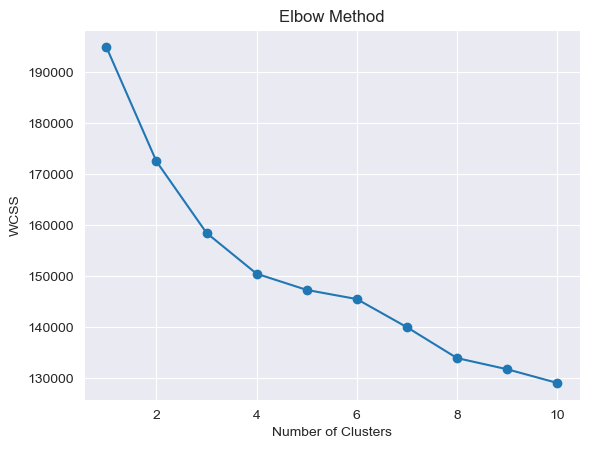

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

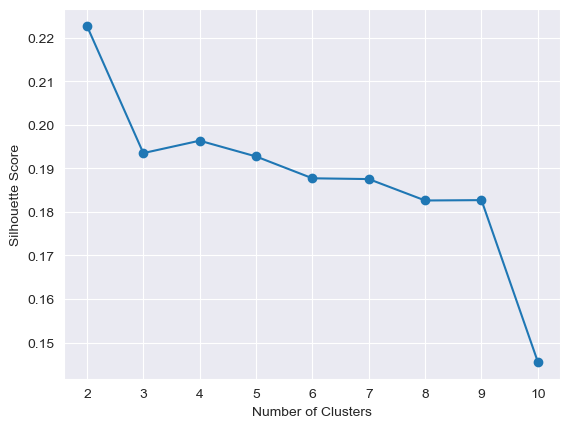

In [51]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

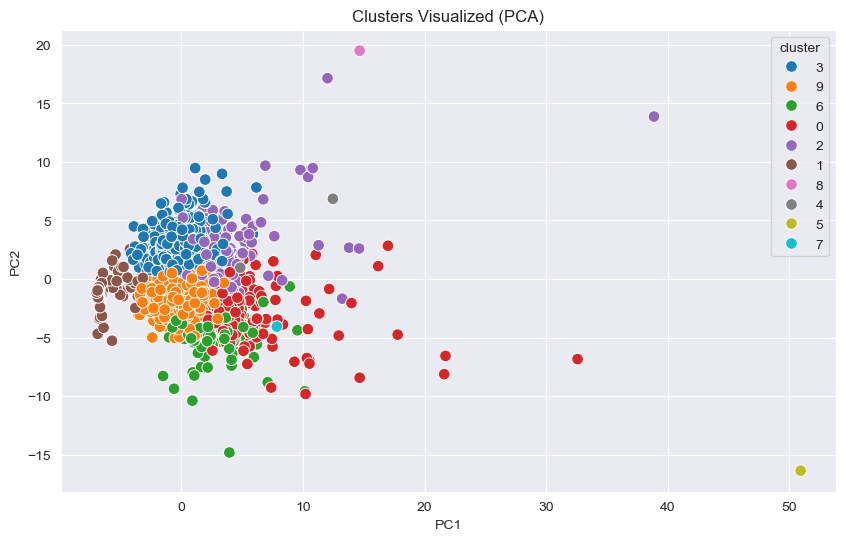

Running t-SNE (this might take a moment)...


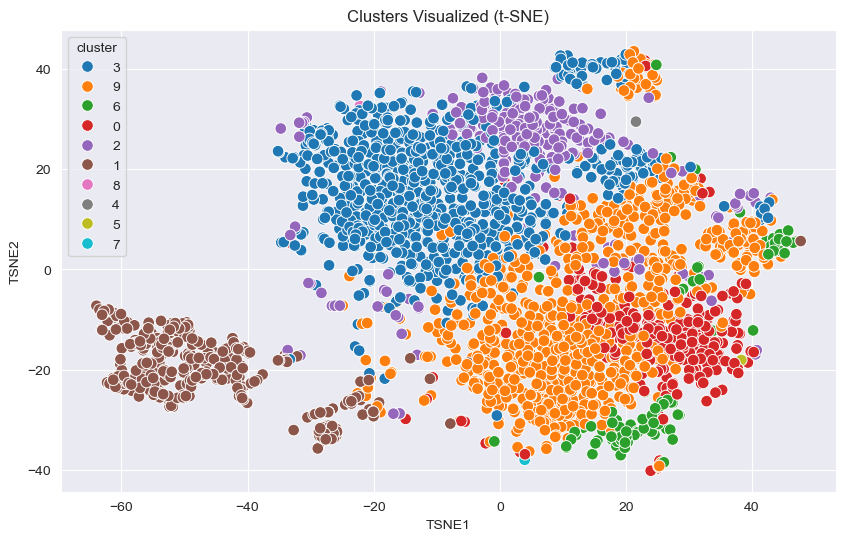

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. PCA Visualization
# PCA reduces the data to 2 dimensions while preserving global variance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

# Create plotting dataframe
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['cluster'] = labels
# Convert to string to ensure discrete coloring
plot_df['cluster'] = plot_df['cluster'].astype(str)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=70)
plt.title('Clusters Visualized (PCA)')
plt.show()

print("Running t-SNE (this might take a moment)...")
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plot_df['TSNE1'] = X_tsne[:, 0]
plot_df['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='TSNE1', y='TSNE2', hue='cluster', palette='tab10', s=70)
plt.title('Clusters Visualized (t-SNE)')
plt.show()

In [58]:
target.columns

['league',
 'team',
 'player',
 "('Playing Time', '90s')",
 "('Performance', 'Gls')",
 "('Performance', 'Ast')",
 "('Performance', 'G+A')",
 "('Performance', 'G-PK')",
 "('Performance', 'PK')",
 "('Performance', 'PKatt')",
 "('Performance', 'CrdY')",
 "('Performance', 'CrdR')",
 "('Expected', 'xG')",
 "('Expected', 'npxG')",
 "('Expected', 'xAG')",
 "('Expected', 'npxG+xAG')",
 "('Progression', 'PrgC')",
 "('Progression', 'PrgP')",
 "('Progression', 'PrgR')",
 "('Touches', 'Touches')",
 "('Touches', 'Def Pen')",
 "('Touches', 'Def 3rd')",
 "('Touches', 'Mid 3rd')",
 "('Touches', 'Att 3rd')",
 "('Touches', 'Att Pen')",
 "('Touches', 'Live')",
 "('Take-Ons', 'Att')",
 "('Take-Ons', 'Succ')",
 "('Take-Ons', 'Succ%')",
 "('Take-Ons', 'Tkld')",
 "('Take-Ons', 'Tkld%')",
 "('Carries', 'Carries')",
 "('Carries', 'TotDist')",
 "('Carries', 'PrgDist')",
 "('Carries', 'PrgC')",
 "('Carries', '1/3')",
 "('Carries', 'CPA')",
 "('Carries', 'Mis')",
 "('Carries', 'Dis')",
 "('Receiving', 'Rec')",
 "

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

target_cluster_id = num = new.get_column("cluster")
identifier_cols = ["league", "team", "player"]

WG_Profile = target[["league", "team", "player",
     "('Expected', 'npxG+xAG')",
     "('Take-Ons', 'Succ%')",
     "('Carries', 'PrgC')",
     "('Progression', 'PrgP')",
     "('Carries', '1/3')",
     "('Carries', 'CPA')",
     "('SCA', 'SCA')",
     "('GCA', 'GCA')",
     "('Tackles', 'Tkl')",
     "('Challenges', 'Tkl%')",
     "('Challenges', 'Tkl')",
     "('Tkl+Int', '')"]]

nums = WG_Profile.select(pl.col(pl.Float64, pl.Int64))
print(f"Sub-clustering {WG_Profile.height} players from Cluster {target_cluster_id}...")

scaler_sub = StandardScaler()
X_sub_scaled = scaler_sub.fit_transform(nums)

kmeans_sub = KMeans(n_clusters=6, random_state=42)
sub_labels = kmeans_sub.fit_predict(X_sub_scaled)

WG = WG_Profile.with_columns(
    pl.Series(name="sub_cluster", values=sub_labels)
)

Sub-clustering 2365 players from Cluster shape: (1,)
Series: 'cluster' [i32]
[
	0
]...


In [65]:
WG

league,team,player,"('Expected', 'npxG+xAG')","('Take-Ons', 'Succ%')","('Carries', 'PrgC')","('Progression', 'PrgP')","('Carries', '1/3')","('Carries', 'CPA')","('SCA', 'SCA')","('GCA', 'GCA')","('Tackles', 'Tkl')","('Challenges', 'Tkl%')","('Challenges', 'Tkl')","('Tkl+Int', '')",sub_cluster
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
"""ENG-EFL Championship""","""Blackburn""","""Adam Forshaw""",0.063492,50.0,0.47619,3.492063,0.15873,0.0,1.111111,0.0,2.857143,41.2,1.111111,3.809524,1
"""ENG-EFL Championship""","""Blackburn""","""Amario Cozier-Duberry""",0.1875,54.8,4.375,3.25,1.375,1.75,2.75,0.0,1.5,50.0,1.0,1.625,0
"""ENG-EFL Championship""","""Blackburn""","""Andreas Weimann""",0.579618,40.0,1.146497,3.248408,0.509554,0.44586,1.847134,0.191083,0.573248,50.0,0.191083,0.828025,2
"""ENG-EFL Championship""","""Blackburn""","""Arnór Sigurðsson""",0.285714,100.0,1.428571,10.0,4.285714,0.0,5.714286,1.428571,1.428571,100.0,1.428571,1.428571,1
"""ENG-EFL Championship""","""Blackburn""","""Cauley Woodrow""",0.24,16.7,1.2,2.0,1.6,0.4,2.0,0.4,0.8,25.0,0.4,0.8,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Por-Primeira Liga""","""Vitória""","""Tiago Silva""",0.193798,53.5,0.775194,8.875969,0.736434,0.03876,3.875969,0.348837,1.782946,48.1,0.503876,2.868217,1
"""Por-Primeira Liga""","""Vitória""","""Tomás Händel""",0.125,50.0,1.428571,6.214286,1.5,0.035714,2.428571,0.214286,1.5,58.7,0.964286,2.857143,1
"""Por-Primeira Liga""","""Vitória""","""Vando Félix""",0.131148,30.3,3.278689,2.622951,2.459016,1.311475,2.622951,0.163934,1.803279,50.0,0.983607,3.114754,1


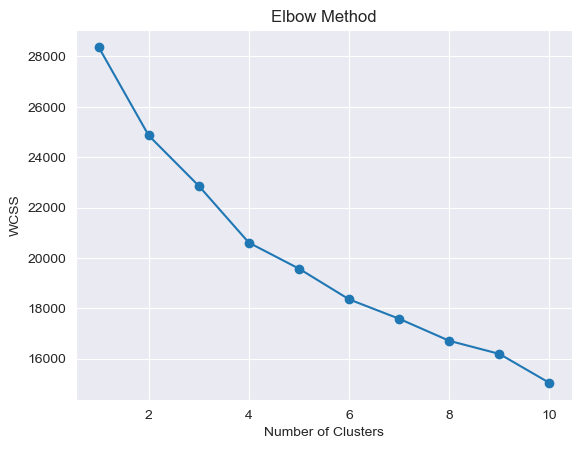

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sub_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

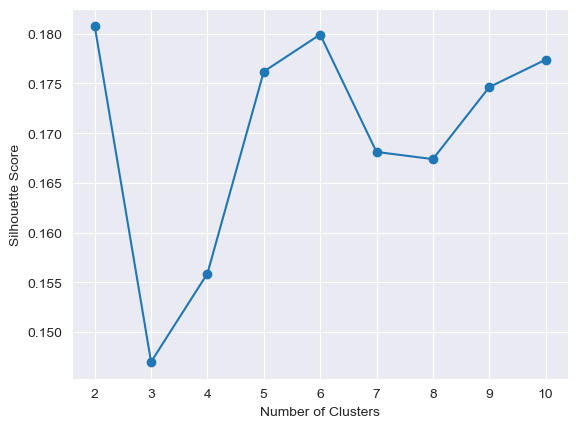

In [67]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sub_scaled)
    scores.append(silhouette_score(X_sub_scaled, labels))

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [72]:
new = WG.select(["player", "team", "sub_cluster"]).filter(pl.col("player") == "Amad Diallo")
num = new.get_column("sub_cluster")
new
new2 = WG.select(["player", "team", "sub_cluster"]).filter(pl.col("sub_cluster") == num)
new2

player,team,sub_cluster
str,str,i32
"""Amario Cozier-Duberry""","""Blackburn""",0
"""Emmanuel Dennis""","""Blackburn""",0
"""Sammie Szmodics""","""Blackburn""",0
"""Tyrhys Dolan""","""Blackburn""",0
"""Anis Mehmeti""","""Bristol City""",0
…,…,…
"""Marcus Edwards""","""Sporting CP""",0
"""Pedro Gonçalves""","""Sporting CP""",0
"""João Mendes""","""Vitória""",0
